# Project 2 Deep Learning Evaluation

In [1]:
# Initial imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pickle
import json


%matplotlib inline

In [2]:
# Read in data
data = Path("forlex.csv")
clean_df = pd.read_csv(data)
clean_df.head()

,ID,LIMIT_BAL,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_pay,Total_Missed_Pymts,Payment_Ratio,Total_Bill_AMT,Total_Payment,%_Amount_Paid,Risk_Level
0,1,20000.0,1,24,1,1,0,0,0,0,...,0.0,0.0,0.0,1,2,33.333333,7704.0,689.0,8.943406,Moderate
1,2,120000.0,2,26,0,1,0,0,0,1,...,1000.0,0.0,2000.0,1,2,33.333333,17077.0,5000.0,29.279147,Moderate
2,3,90000.0,2,34,0,0,0,0,0,0,...,1000.0,1000.0,5000.0,0,0,0.000000,101653.0,11018.0,10.838834,NaN
3,4,50000.0,1,37,0,0,0,0,0,0,...,1100.0,1069.0,1000.0,0,0,0.000000,231334.0,8388.0,3.625926,NaN
4,5,50000.0,1,57,0,0,0,0,0,0,...,9000.0,689.0,679.0,0,0,0.000000,109339.0,59049.0,54.005433,NaN


In [3]:
clean_df.corr()['default_pay']

ID                   -0.013952
LIMIT_BAL            -0.153520
MARRIAGE             -0.024339
AGE                   0.013890
PAY_0                 0.368117
PAY_2                 0.338022
PAY_3                 0.293583
PAY_4                 0.275495
PAY_5                 0.266959
PAY_6                 0.246089
BILL_AMT1            -0.019644
BILL_AMT2            -0.014193
BILL_AMT3            -0.014076
BILL_AMT4            -0.010156
BILL_AMT5            -0.006760
BILL_AMT6            -0.005372
PAY_AMT1             -0.072929
PAY_AMT2             -0.058579
PAY_AMT3             -0.056250
PAY_AMT4             -0.056827
PAY_AMT5             -0.055124
PAY_AMT6             -0.053183
default_pay           1.000000
Total_Missed_Pymts    0.398394
Payment_Ratio         0.398394
Total_Bill_AMT       -0.012691
Total_Payment        -0.102354
%_Amount_Paid        -0.011391
Name: default_pay, dtype: float64

In [4]:
X = clean_df[['MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','Total_Missed_Pymts','Payment_Ratio']]

y = clean_df[['default_pay']].values

In [5]:
# Scale the data of the features set using the StandardScaler
from sklearn.preprocessing import StandardScaler



In [6]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
# Create the scaler instance
X_scaler = StandardScaler()

In [8]:
# Fit the scaler
X_scaler.fit(X_train)

StandardScaler()

In [9]:
# Scale the features data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Deep Learning 1 Hidden Level

In [10]:
# Create a shallow, 1 hidden layer, neural network
nn = Sequential()

# Hidden layer
nn.add(Dense(units=8, input_dim=10, activation="tanh"))

# Output layer
nn.add(Dense(units=1, activation="sigmoid"))

In [11]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy","mse"])

# Fit the model
model_1 = nn.fit(X_train_scaled, y, validation_split=0.3, epochs=50)


Epoch 1/50
493/493 [==============================] - 2s 2ms/step - loss: 0.1962 - accuracy: 0.7274 - mse: 0.1962 - val_loss: 0.1814 - val_accuracy: 0.7646 - val_mse: 0.1814
Epoch 2/50
493/493 [==============================] - 1s 2ms/step - loss: 0.1755 - accuracy: 0.7757 - mse: 0.1755 - val_loss: 0.1796 - val_accuracy: 0.7683 - val_mse: 0.1796
Epoch 3/50
493/493 [==============================] - 1s 2ms/step - loss: 0.1746 - accuracy: 0.7760 - mse: 0.1746 - val_loss: 0.1794 - val_accuracy: 0.7685 - val_mse: 0.1794
Epoch 4/50
493/493 [==============================] - 1s 2ms/step - loss: 0.1743 - accuracy: 0.7760 - mse: 0.1743 - val_loss: 0.1791 - val_accuracy: 0.7685 - val_mse: 0.1791
Epoch 5/50
493/493 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.7760 - mse: 0.1742 - val_loss: 0.1792 - val_accuracy: 0.7685 - val_mse: 0.1792
Epoch 6/50
493/493 [==============================] - 1s 2ms/step - loss: 0.1741 - accuracy: 0.7762 - mse: 0.1741 - val_loss: 0.17

KeyboardInterrupt: 

In [12]:
# serialize to JSON
#json_file = model_1.to_json()
#with open(json_file_path, "w") as file:
    #file.write(model1_json_file)
# serialize weights to HDF5
#model_1.save_weights(h5_file)

In [13]:
# serialize model to JSON
model_json = nn.to_json()
with open("model_1.json", "w") as json_file:
    json_file.write(model_json)


In [14]:
# serialize weights to HDF5
nn.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
# Define the model - deep neural network with two layers
nn_2 = Sequential()

# First hidden layer
nn_2.add(Dense(units=42, input_dim=10, activation="tanh"))

# Second hidden layer
nn_2.add(Dense(units=20, activation="tanh"))

# third
nn_2.add(Dense(units=8, activation="tanh"))

# fourth
nn_2.add(Dense(units=4, activation="tanh"))

# fifth
nn_2.add(Dense(units=2, activation="relu"))

# Output layer
nn_2.add(Dense(units=2, activation="sigmoid"))

In [16]:
# Compile the model
nn_2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy","mse"])

# Fit the model
model_2 = nn_2.fit(X, y, validation_split=0.3, epochs=50, verbose=2)

Epoch 1/50
657/657 - 2s - loss: 0.1534 - accuracy: 0.2881 - mse: 0.1534 - val_loss: 0.1388 - val_accuracy: 0.4913 - val_mse: 0.1388
Epoch 2/50
657/657 - 1s - loss: 0.1489 - accuracy: 0.4679 - mse: 0.1489 - val_loss: 0.1368 - val_accuracy: 0.7572 - val_mse: 0.1368
Epoch 3/50
657/657 - 1s - loss: 0.1485 - accuracy: 0.7063 - mse: 0.1485 - val_loss: 0.1361 - val_accuracy: 0.7261 - val_mse: 0.1361
Epoch 4/50
657/657 - 1s - loss: 0.1477 - accuracy: 0.6143 - mse: 0.1477 - val_loss: 0.1357 - val_accuracy: 0.3234 - val_mse: 0.1357
Epoch 5/50
657/657 - 1s - loss: 0.1475 - accuracy: 0.5354 - mse: 0.1475 - val_loss: 0.1352 - val_accuracy: 0.4400 - val_mse: 0.1352
Epoch 6/50
657/657 - 1s - loss: 0.1473 - accuracy: 0.6508 - mse: 0.1473 - val_loss: 0.1359 - val_accuracy: 0.2537 - val_mse: 0.1359
Epoch 7/50
657/657 - 1s - loss: 0.1473 - accuracy: 0.5428 - mse: 0.1473 - val_loss: 0.1348 - val_accuracy: 0.7827 - val_mse: 0.1348
Epoch 8/50
657/657 - 1s - loss: 0.1467 - accuracy: 0.4398 - mse: 0.1467 - va

In [18]:
# serialize model to JSON
model_2_json = nn_2.to_json()
with open("model_2.json", "w") as json_file:
    json_file.write(model_2_json)

In [19]:
nn_2.save_weights("model_2.h5")
print("Saved model to disk")

Saved model to disk


# Evaluate the models

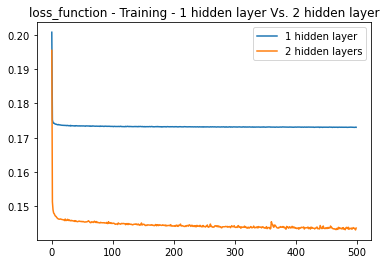

In [156]:
# Plot the loss function of the training results for the two models
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training - 1 hidden layer Vs. 2 hidden layer")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

In [117]:
import numpy as np

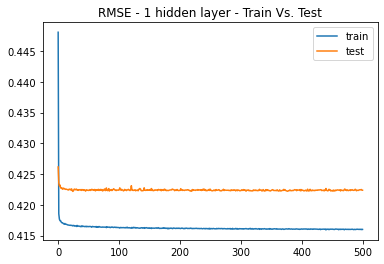

In [157]:
# Plot train vs test for shallow net
plt.plot(np.sqrt(model_1.history['loss']))
plt.plot(np.sqrt(model_1.history['val_loss']))
plt.title("RMSE - 1 hidden layer - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()

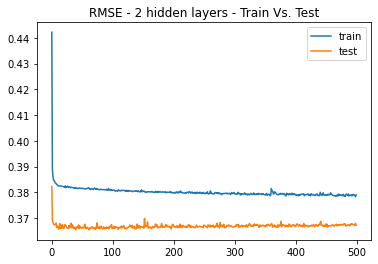

In [158]:
# Plot train vs test for deep net
plt.plot(np.sqrt(model_2.history['loss']))
plt.plot(np.sqrt(model_2.history['val_loss']))
plt.title("RMSE - 2 hidden layers - Train Vs. Test")
plt.legend(["train", "test"])
plt.show()